In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

In [2]:
cdc_df = pd.read_sas('LLCP2021.XPT')

C:\Users\LTabl\Anaconda3\envs\PythonData\lib\site-packages\pandas\io\sas\sas_xport.py:475: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x] = v


In [3]:
cdc_df.shape

(438693, 303)

In [20]:
#cdc_df.columns.tolist()

In [7]:
substance_df=cdc_df.copy()

In [9]:
substance_df=substance_df[['_STATE',
 'BPMEDS',
 'CVDSTRK3',
 'ADDEPEV3',
 'MARITAL',
 'EMPLOY1',
 'SMOKE100',
 'SMOKDAY2',
 'USENOW3',
 'ECIGNOW1',
 'MAXDRNKS',
 'LCSFIRST',
 'LCSLAST',
 'LCSNUMCG',
 'MARIJAN1',
 'USEMRJN3',
 'RSNMRJN2',
 'LASTSMK2',
 'STOPSMK2',
 '_RFHLTH',
 '_PHYS14D',
 '_MENT14D',
 '_HLTHPLN',
 '_RFHYPE6',
 '_MICHD',
 '_RACE',
 '_SEX',
 '_AGEG5YR',
 '_AGE80',
 '_BMI5CAT',
 '_EDUCAG',
 '_INCOMG1',
 '_SMOKER3',
 '_RFSMOK3',
 '_CURECI1',
 'DRNKANY5',
 'DROCDY3_',
 '_RFBING5',
 '_DRNKWK1',
 '_RFDRHV7'
]]

In [10]:
substance_df.shape

(438693, 40)

In [14]:
substance_df = substance_df.rename(columns={'_STATE' : 'STATE',
 'CVDSTRK3' : 'HEART_STROKE',
 'ADDEPEV3' : 'DEPRESSION',
 'MARITAL' : 'MARITAL_STATUS',
 'EMPLOY1' : 'WORK_STATUS',
 'SMOKDAY2' : 'SMOKE_FREQ',
 'USENOW3' : 'TOBAC_FREQ',
 'ECIGNOW1' : 'E_CIG_FREQ',
 'LCSFIRST' : 'SMOKE_STRT_AGE',
 'LCSLAST' : 'SMOKE_END_AGE',
 'LCSNUMCG' : 'AVG_CIGS_DAY',
 'MARIJAN1' : 'MARIJUANA',
 'USEMRJN3' : 'MRJ_METHOD',
 'RSNMRJN2' : 'MRJ_REASON',
 'LASTSMK2' : 'LAST_SMOKE',
 'STOPSMK2' : 'QUIT_SMK',
 '_RFHLTH' : 'GENERAL_HEALTH',
 '_PHYS14D' : 'PHYSICAL_HEALTH',
 '_MENT14D' : 'MENTAL_HEALTH',
 '_HLTHPLN' : 'INSURANCE',
 '_RFHYPE6' : 'HYPERTENSION',
 '_MICHD' : 'HRT_ATTK_OR_DISEASE',
 '_RACE' : 'RACE',
 '_SEX' : 'SEX',
 '_AGEG5YR' : 'AGE_BINS',
 '_AGE80' : 'AGE',
 '_BMI5CAT' : 'BMI',
 '_EDUCAG' : 'EDUCATION',
 '_INCOMG1' : 'INCOME',
 '_SMOKER3' : 'SMOKER_STATUS',
 '_RFSMOK3' : 'SMOKER',
 '_CURECI1' : 'E_CIG_USER',
 'DRNKANY5' : 'ANYDRINKS_PAST30',
 'DROCDY3_' : 'DRINKS_PERDAY',
 '_RFBING5' : 'BINGE_DRNKR',
 '_DRNKWK1' : 'DRINKS_PERWK',
 '_RFDRHV7' : 'HEAVY_DRNKR'})

In [15]:
substance_df.shape

(438693, 40)

In [18]:
substance_df=substance_df[['AGE',
'AGE_BINS',
'BMI',
'EDUCATION',
'INCOME',
'INSURANCE',
'MARITAL_STATUS',
'RACE',
'SEX',
'STATE',
'WORK_STATUS',
'DEPRESSION',
'GENERAL_HEALTH',
'MENTAL_HEALTH',
'PHYSICAL_HEALTH',
'BPMEDS',
'HEART_STROKE',
'HRT_ATTK_OR_DISEASE',
'HYPERTENSION',
'MAXDRNKS',
'ANYDRINKS_PAST30',
'BINGE_DRNKR',
'DRINKS_PERDAY',
'DRINKS_PERWK',
'HEAVY_DRNKR',
'MARIJUANA',
'MRJ_METHOD',
'MRJ_REASON',
'SMOKE100',
'AVG_CIGS_DAY',
'E_CIG_FREQ',
'E_CIG_USER',
'SMOKE_END_AGE',
'SMOKE_FREQ',
'SMOKE_STRT_AGE',
'SMOKER',
'SMOKER_STATUS',
'TOBAC_FREQ',
'LAST_SMOKE',
'QUIT_SMK']]

In [19]:
substance_df.head()

,AGE,AGE_BINS,BMI,EDUCATION,INCOME,INSURANCE,MARITAL_STATUS,RACE,SEX,STATE,...,E_CIG_FREQ,E_CIG_USER,SMOKE_END_AGE,SMOKE_FREQ,SMOKE_STRT_AGE,SMOKER,SMOKER_STATUS,TOBAC_FREQ,LAST_SMOKE,QUIT_SMK
0,70.0,11.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0,...,3.0,1.0,NaN,3.0,NaN,1.0,3.0,3.0,NaN,NaN
1,67.0,10.0,NaN,4.0,9.0,1.0,9.0,2.0,2.0,1.0,...,3.0,1.0,NaN,NaN,NaN,1.0,4.0,3.0,NaN,NaN
2,72.0,11.0,3.0,2.0,2.0,1.0,3.0,2.0,2.0,1.0,...,3.0,1.0,NaN,NaN,NaN,1.0,4.0,3.0,NaN,NaN
3,62.0,9.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,...,3.0,1.0,NaN,NaN,NaN,1.0,4.0,3.0,NaN,NaN
4,76.0,12.0,3.0,1.0,2.0,1.0,1.0,7.0,1.0,1.0,...,3.0,1.0,NaN,NaN,NaN,1.0,4.0,2.0,NaN,NaN


In [21]:
substance_df.isnull().sum()

AGE                         0
AGE_BINS                    0
BMI                     46852
EDUCATION                   0
INCOME                      0
INSURANCE                   0
MARITAL_STATUS              5
RACE                        0
SEX                         0
STATE                       0
WORK_STATUS              3588
DEPRESSION                  3
GENERAL_HEALTH              0
MENTAL_HEALTH               0
PHYSICAL_HEALTH             0
BPMEDS                 266560
HEART_STROKE                2
HRT_ATTK_OR_DISEASE      4635
HYPERTENSION                0
MAXDRNKS               229430
ANYDRINKS_PAST30            0
BINGE_DRNKR                 0
DRINKS_PERDAY               0
DRINKS_PERWK                0
HEAVY_DRNKR                 0
MARIJUANA              301133
MRJ_METHOD             425147
MRJ_REASON             425161
SMOKE100                21232
AVG_CIGS_DAY           426594
E_CIG_FREQ              23025
E_CIG_USER                  0
SMOKE_END_AGE          426575
SMOKE_FREQ

HEART_STROKE        0.10
SMOKE100            0.08
BPMEDS              0.07
SEX                 0.07
EDUCATION           0.06
INCOME              0.06
SMOKER_STATUS       0.05
QUIT_SMK            0.04
MARITAL_STATUS      0.04
MRJ_REASON          0.03
RACE                0.03
DEPRESSION          0.02
BINGE_DRNKR         0.02
HEAVY_DRNKR         0.02
DRINKS_PERDAY       0.02
AVG_CIGS_DAY        0.01
DRINKS_PERWK        0.01
MAXDRNKS            0.01
E_CIG_USER          0.01
INSURANCE           0.01
SMOKER              0.01
SMOKE_STRT_AGE      0.01
TOBAC_FREQ          0.00
LAST_SMOKE         -0.00
STATE              -0.00
MRJ_METHOD          0.00
E_CIG_FREQ         -0.01
ANYDRINKS_PAST30   -0.01
MARIJUANA          -0.02
SMOKE_END_AGE      -0.02
MENTAL_HEALTH      -0.02
SMOKE_FREQ         -0.03
BMI                -0.05
PHYSICAL_HEALTH    -0.11
HYPERTENSION       -0.15
GENERAL_HEALTH     -0.16
WORK_STATUS        -0.20
AGE_BINS           -0.21
AGE                -0.22
dtype: float64


<AxesSubplot:>

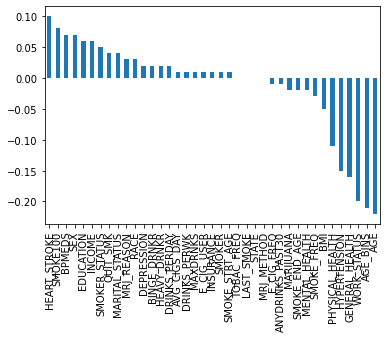

In [23]:
#Corr with HEART_STROKE
print(round(substance_df.corrwith(substance_df['HRT_ATTK_OR_DISEASE']),2).sort_values(ascending=False).drop('HRT_ATTK_OR_DISEASE'))
round(substance_df.corrwith(substance_df['HRT_ATTK_OR_DISEASE']),2).sort_values(ascending=False).drop('HRT_ATTK_OR_DISEASE').plot(kind='bar')

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

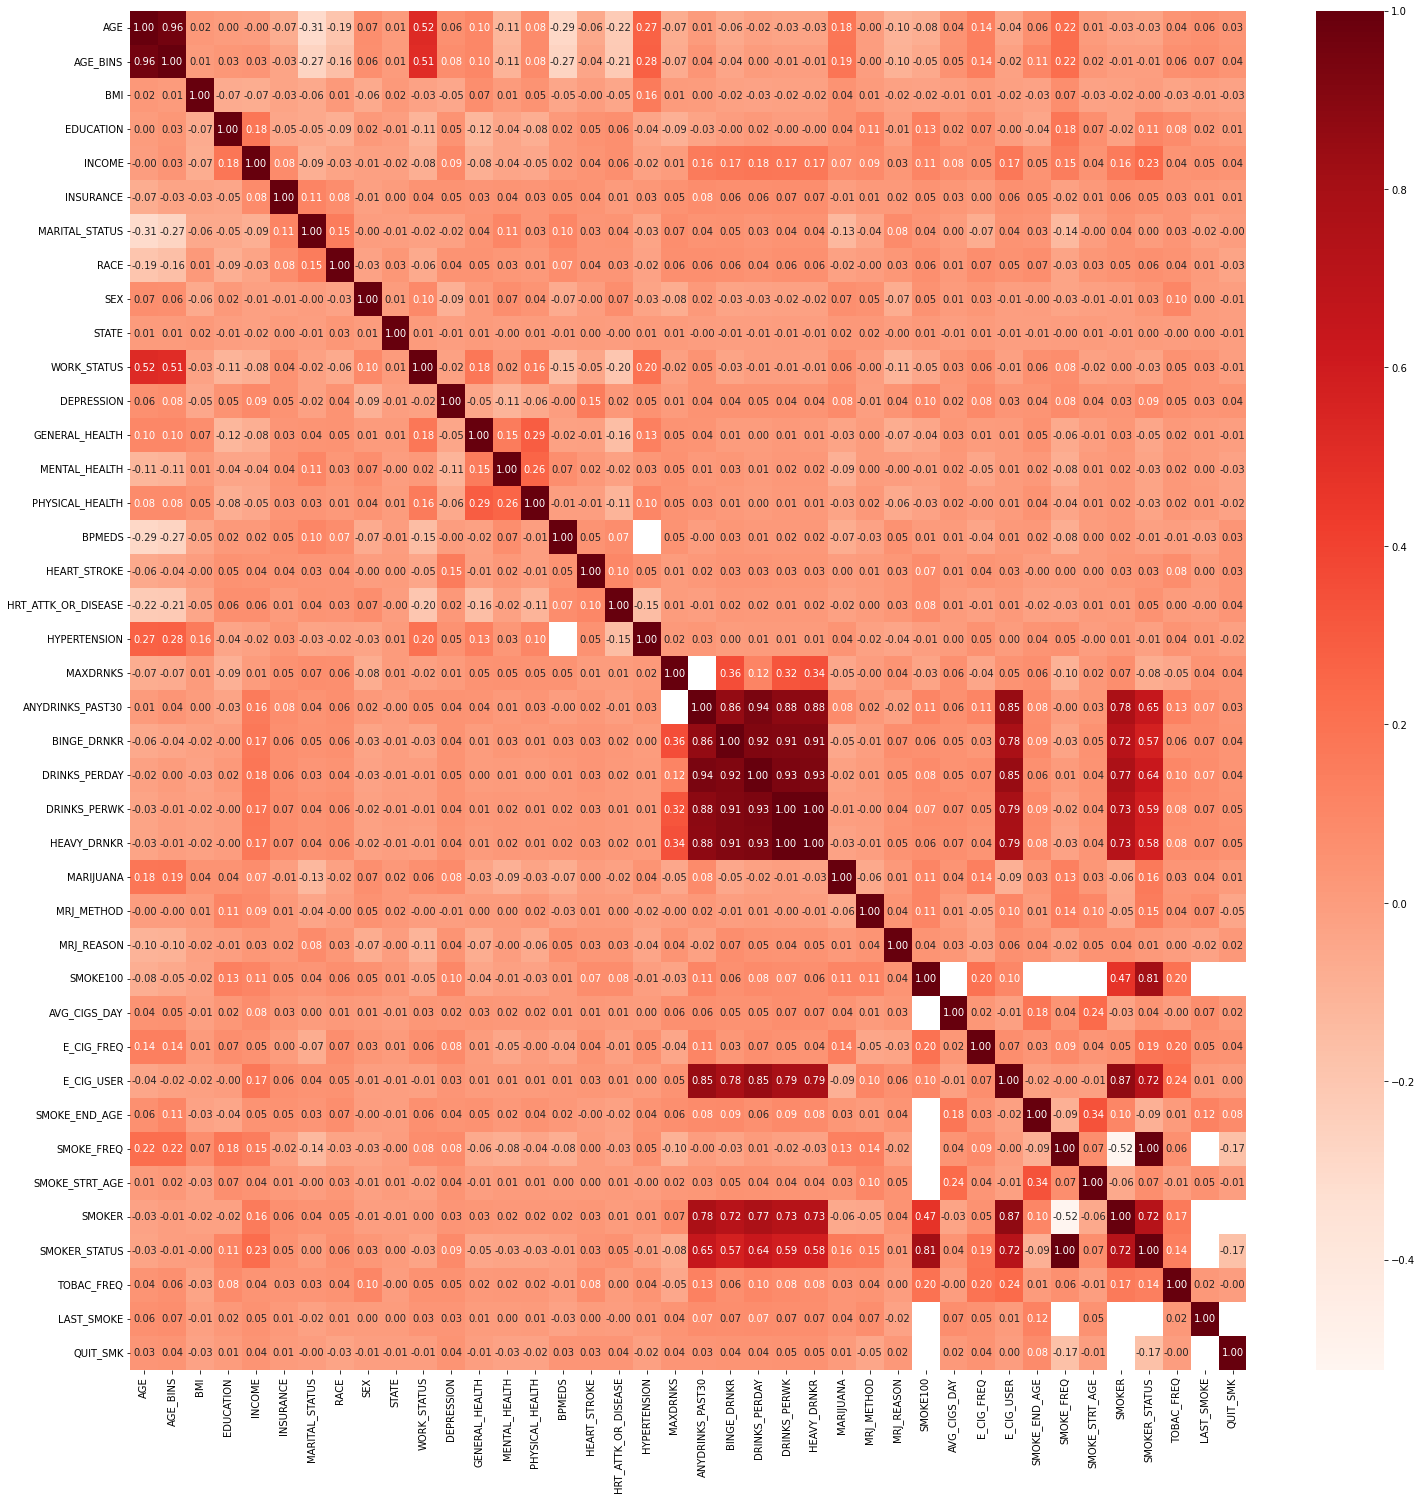

In [29]:
plt.figure(figsize=(25,25))
cor = substance_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()